# Problema

Predecir el coste del seguro

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
ruta = r"C:\Users\EDEM\Documents\ENTREGABLES ML\insurance.csv"
data = pd.read_csv(ruta)

In [5]:
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de regresión

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

## Implementación

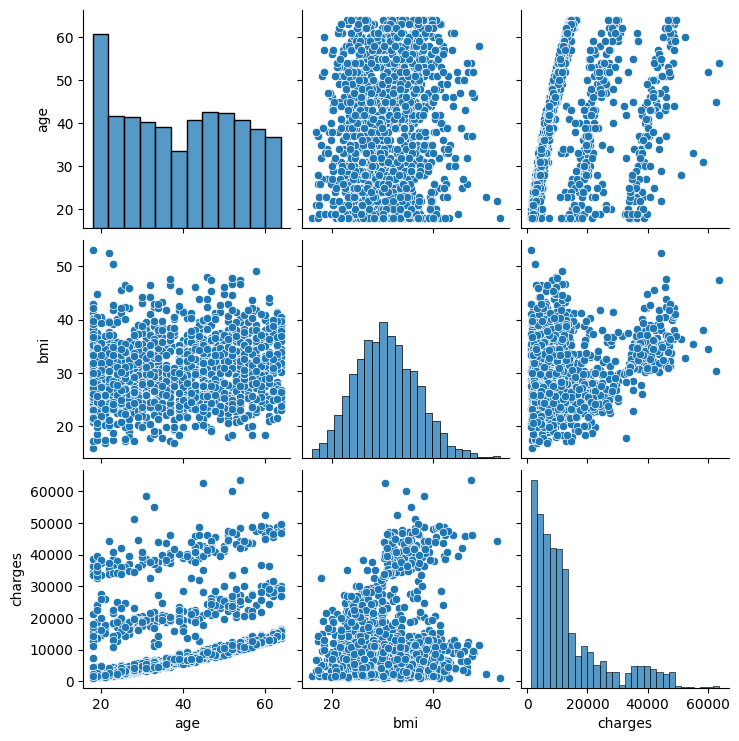

Regresión Lineal:
Mean Squared Error: 131043916.5336979
R^2 Score: 0.1559099048700323

Random Forest:
Mean Squared Error: 157361414.56171143
R^2 Score: -0.013608375731236855


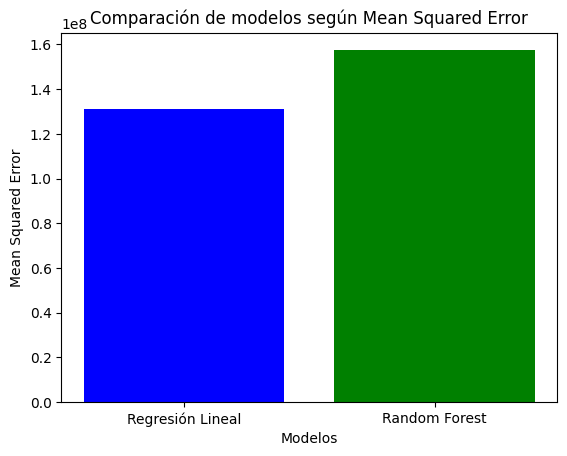

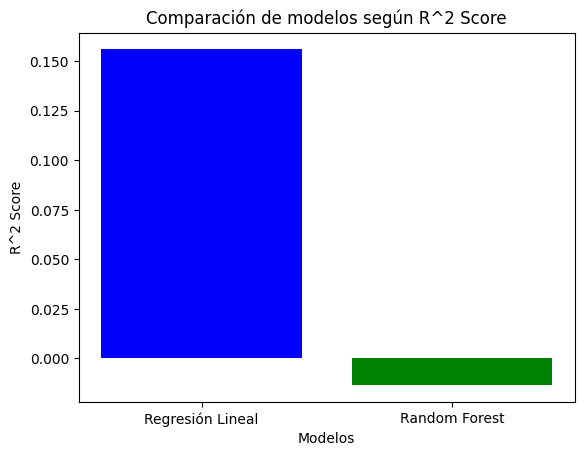

In [6]:
# Análisis exploratorio de los datos elegidos
sns.pairplot(data[['age', 'bmi', 'charges']])
plt.show()

le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])

# Se dividen los datos en características (X) y objetivo (y)
X = data[['age', 'bmi', 'sex']]
y = data['charges']

# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Se escalan las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Hacemos predicciones en el conjunto de prueba
lr_predictions = lr_model.predict(X_test_scaled)

# Se evalúan los modelos
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Regresión Lineal:")
print("Mean Squared Error:", lr_mse)
print("R^2 Score:", lr_r2)

# Entrenamiento del Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predicciones del conjunto de prueba
rf_predictions = rf_model.predict(X_test_scaled)

# Se evalúan los modelos
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("\nRandom Forest:")
print("Mean Squared Error:", rf_mse)
print("R^2 Score:", rf_r2)

# Comparación de los modelos
models = ['Regresión Lineal', 'Random Forest']
mse_scores = [lr_mse, rf_mse]
r2_scores = [lr_r2, rf_r2]

plt.bar(models, mse_scores, color=['blue', 'green'])
plt.xlabel('Modelos')
plt.ylabel('Mean Squared Error')
plt.title('Comparación de modelos según Mean Squared Error')
plt.show()

plt.bar(models, r2_scores, color=['blue', 'green'])
plt.xlabel('Modelos')
plt.ylabel('R^2 Score')
plt.title('Comparación de modelos según R^2 Score')
plt.show()


# Conclusiones

**Mean Squared Error (MSE)**, calidad de las predicciones realizadas por el modelo:
- Para la regresión lineal, el MSE es aproximadamente 131,043,916.54.
- Para el Random Forest, el MSE es aproximadamente 157,361,414.56.

*Un MSE menor indica un mejor ajuste del modelo a los datos*. En comparación, el modelo de regresión lineal tiene un MSE más bajo, lo que sugiere que podría estar haciendo predicciones más precisas que el modelo de Random Forest.

**Coeficiente de determinación (R^2)**, proporción de la varianza en la variable dependiente predecible a partir de las independientes:
- Para la regresión lineal, el coeficiente R^2 es aproximadamente 0.156.
- Para el Random Forest, el coeficiente R^2 es aproximadamente -0.014.
*Un R^2 más cercano a 1 indica un mejor ajuste del modelo a los datos*.
Sin embargo, un R^2 negativo, como el del Random Forest, indica que el modelo no se ajusta bien a los datos.

**Comparación de modelos**:
En resumen, y basado en estas métricas, se puede concluir que el modelo de **regresión lineal** tiene un mejor desempeño en este problema en comparación con el de **Random Forest**, ya que tiene un MSE más bajo y un R^2 más alto.